# Relatório de Análise VIII

## Identificando e Removendo Outiers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [2]:
dados = pd.read_csv('dados/aluguel_amostra.csv', sep=';')

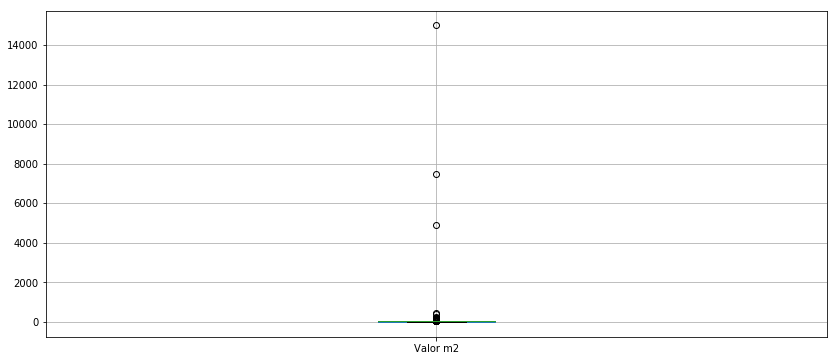

In [5]:
# BoxPlot com poluição
dados.boxplot(['Valor m2'])

In [8]:
dados[dados['Valor m2'] >= 6000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
535,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
7493,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [9]:
valor = dados['Valor m2']

In [10]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)

IIQ = Q3 - Q1

limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [11]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

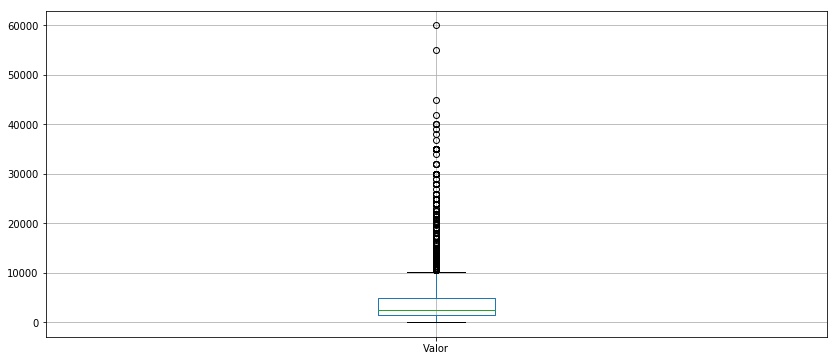

In [12]:
# BoxPlot sem poluição
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa911df7438>]], dtype=object)

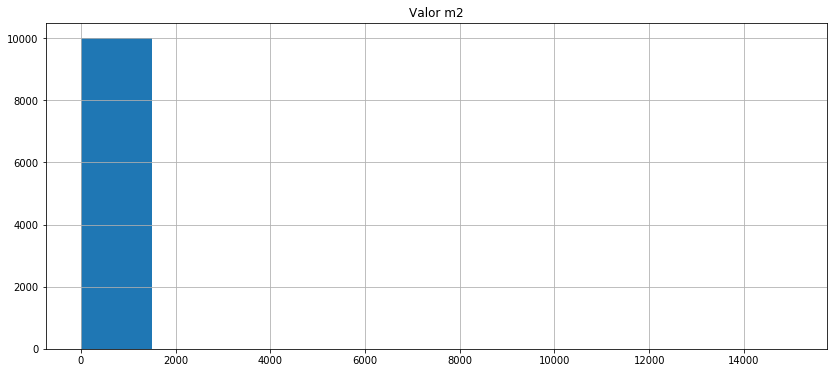

In [14]:
# Histograma antes
dados.hist(['Valor m2'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa911d6f9e8>]], dtype=object)

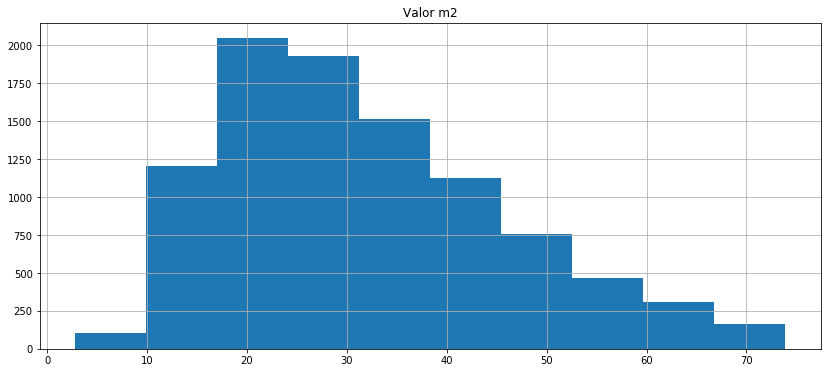

In [15]:
# Histograma depois
dados_new.hist(['Valor m2'])

In [17]:
print("Q1 = " + str(Q1))
print("Q2 = " + str(Q3))
print("IIQ = " + str(IIQ))

print("Limite superior: " + str(limite_superior))
print("Limite inferior: " + str(limite_inferior))

Q1 = 21.25
Q2 = 42.31
IIQ = 21.060000000000002
Limite superior: 73.9
Limite inferior: -10.340000000000003


## Explorando as metricas

/home/rafael/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


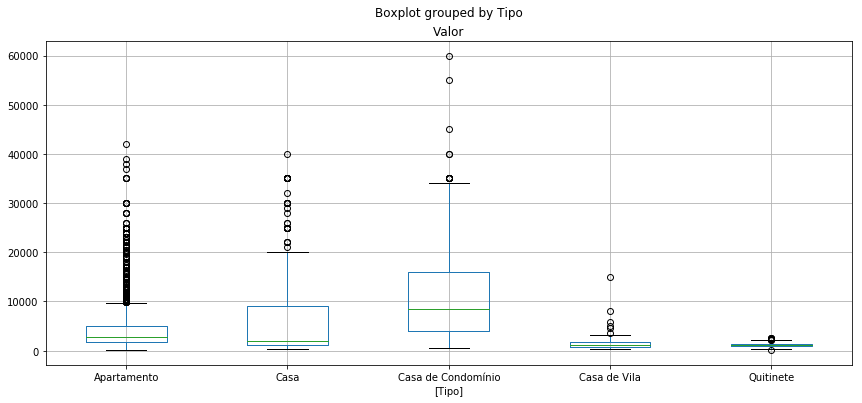

In [18]:
# BoxPlot com poluição
dados_new.boxplot(['Valor'], by = ["Tipo"])

In [19]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [20]:
grupo_tipo.groups

{'Apartamento': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
            dtype='int64', length=8613),
 'Casa': Int64Index([  13,   31,   50,   54,   74,  109,  115,  123,  127,  172,
             ...
             9667, 9723, 9750, 9783, 9831, 9861, 9870, 9888, 9894, 9903],
            dtype='int64', length=426),
 'Casa de Condomínio': Int64Index([  69,   71,   72,   76,   93,  117,  118,  122,  128,  215,
             ...
             9657, 9670, 9689, 9691, 9746, 9770, 9784, 9898, 9920, 9981],
            dtype='int64', length=454),
 'Casa de Vila': Int64Index([  23,   53,   91,  269,  444,  627,  809,  836,  871, 1081,
             ...
             9132, 9177, 9239, 9260, 9264, 9345, 9601, 9707, 9889, 9959],
            dtype='int64', length=117),
 'Quitinete': Int64Index([  28,   45,   57,   65,   67,  137,  155,  162,  174,  222,
             ...
             9647, 

In [21]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)

IIQ = Q3 - Q1

limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [22]:
Q1dados_new

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    3925.0
Casa de Vila           800.0
Quitinete              900.0
Name: Valor, dtype: float64

In [23]:
limite_inferior['Apartamento']

-3250.0

In [32]:
novos_dados = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_toleravel = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_toleravel
    dados_selecao = dados[selecao]
    novos_dados = pd.concat([novos_dados, dados_selecao])

/home/rafael/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


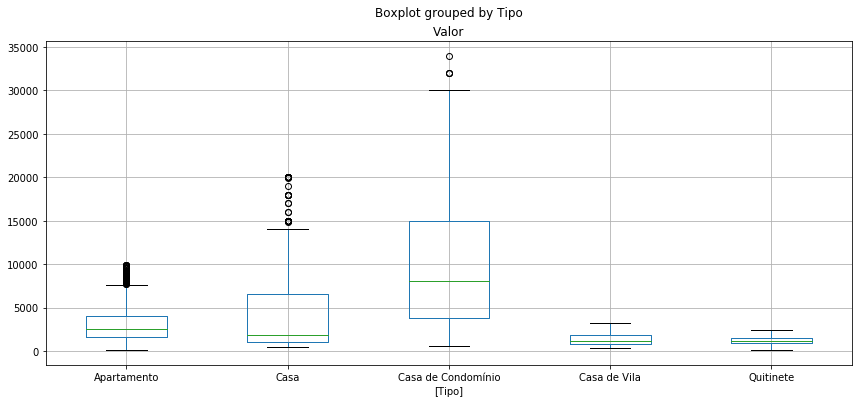

In [33]:
# BoxPlot sem poluição
novos_dados.boxplot(['Valor'], by = ["Tipo"])

In [35]:
novos_dados.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep=';', index=False)